## Notebook: Running UTOPIA Model Step by Step

### Import the necessary libraries and the UTOPIA class.

In [1]:
import os
import json
from utopia import utopiaModel  

#### Step 1: Load Configuration and Data Files

In [2]:

# Load the default configuration and data from the 'data' folder.
config_data = utopiaModel.load_json_file("data/default_config.json")
data_data = utopiaModel.load_json_file("data/default_data.json")


In [3]:

# Display the loaded config and data to ensure they were loaded correctly.
print("Loaded Configuration Data:", config_data)
print("Loaded Input Data:", data_data)


Loaded Configuration Data: {'big_bin_diameter_um': 5000, 'N_sizeBins': 5, 'vol_algal_cell_m3': 2e-16, 'spm_density_kg_m3': 1388, 'boxName': 'Utopia', 'comp_input_file_name': 'inputs_compartments.csv', 'comp_interactFile_name': 'compartment_interactions.csv', 'MPforms_list': ['freeMP', 'heterMP', 'biofMP', 'heterBiofMP'], 'solver': 'SteadyState', 'compartment_types': {'UTOPIA_surfaceSea_water_compartments': ['Ocean_Surface_Water', 'Coast_Surface_Water'], 'UTOPIA_water_compartments': ['Ocean_Mixed_Water', 'Ocean_Column_Water', 'Coast_Column_Water', 'Surface_Freshwater', 'Bulk_Freshwater'], 'UTOPIA_deep_soil_compartments': ['Beaches_Deep_Soil', 'Background_Soil', 'Impacted_Soil'], 'UTOPIA_soil_surface_compartments': ['Beaches_Soil_Surface', 'Background_Soil_Surface', 'Impacted_Soil_Surface'], 'UTOPIA_sediment_compartment': ['Sediment_Freshwater', 'Sediment_Ocean', 'Sediment_Coast'], 'UTOPIA_air_compartments': ['Air']}}
Loaded Input Data: {'MPdensity_kg_m3': 980, 'MP_composition': 'PE', 's


#### Step 2: Initialize the UTOPIA Model with the Loaded Data

In [4]:

# We now initialize the model by passing the loaded data into the UTOPIA class.
model = utopiaModel(config=config_data, data=data_data)


In [5]:
import copy

In [6]:
base_emiss_dict=model.emiss_dict_g_s
for compartment, values in base_emiss_dict.items():
    if any(v != 0 for v in values.values()):
        emission_pattern = values
        source_compartment = compartment
        break

# Step 2: Generate new dictionaries moving emission to each compartment


new_dict = copy.deepcopy(base_emiss_dict)

# Clear all emissions
for comp in new_dict:
    for k in new_dict[comp]:
        new_dict[comp][k] = 0

# Apply the emission pattern to the target compartment
new_dict["Air"] = copy.deepcopy(emission_pattern)

new_model=copy.copy(model)
new_model.emiss_dict_g_s=new_dict
    

In [7]:
new_model.summarize()

Model: UTOPIA
Microplastic Density (kg/m3): 980
MP shape:  sphere
Emissions made to MP form:  freeMP
Fragmentation style: Mixed (F = 0.5)
Fragmetation timescale (days):  36.5
Discorporation timescale (days):  66000
Emissions to Air for size fraction 5000.0 µm: 250000 g/s


In [8]:
new_model.run()

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


In [9]:
model.summarize()

Model: UTOPIA
Microplastic Density (kg/m3): 980
MP shape:  sphere
Emissions made to MP form:  freeMP
Fragmentation style: Mixed (F = 0.5)
Fragmetation timescale (days):  36.5
Discorporation timescale (days):  66000
Emissions to Ocean_Surface_Water for size fraction 5000.0 µm: 250000 g/s


#### Step 3: Running the Model


In [10]:
model.run()  # Run the model to estimate steady state solution for the system.

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


In [11]:
from results_processing.mass_balance_check import*
massBalance(model)

Difference inflow-outflow = -1.77271431311965e-07


'-1.77271431311965e-07'

In [12]:
from results_processing.mass_balance_check import*
massBalance(new_model)

Difference inflow-outflow = -1.3026874512434006e-07


'-1.3026874512434006e-07'


#### Step 4: Output and Results


In [13]:
from results_processing.process_results import*
# Process results
processor = ResultsProcessor(model)  # Pass model with results


### Process rate constants

p:\Python Scripts\UTOPIA_package\utopia\src\utopia\results_processing\process_results.py:677: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  selected_data = data_raw.applymap(sum_if_list)
p:\Python Scripts\UTOPIA_package\utopia\src\utopia\results_processing\process_results.py:678: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  log_data = selected_data.applymap(lambda x: np.log10(x) if x > 0 else np.nan)


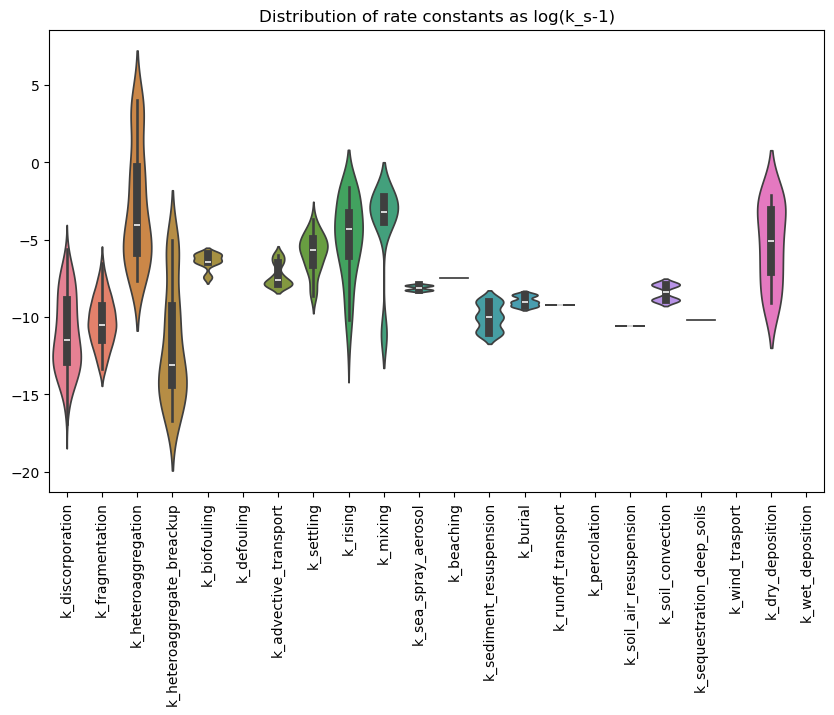

,Compartment,MP_form,Size_Bin,k_discorporation,k_fragmentation,k_heteroaggregation,k_heteroaggregate_breackup,k_biofouling,k_defouling,k_advective_transport,...,k_sediment_resuspension,k_burial,k_runoff_transport,k_percolation,k_soil_air_resuspension,k_soil_convection,k_sequestration_deep_soils,k_wind_trasport,k_dry_deposition,k_wet_deposition
0,Ocean_Surface_Water,freeMP,mp1,1.215536e-14,"[0.0, 0.0, 0.0, 0.0, 0.0]",2.246885e-08,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ocean_Surface_Water,freeMP,mp2,1.215536e-12,"[3.1709791983764586e-10, 0.0, 0.0, 0.0, 0.0]",5.936119e-08,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ocean_Surface_Water,freeMP,mp3,1.215536e-10,"[1.5854895991882295e-09, 1.5854895991882295e-0...",8.093206e-06,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ocean_Surface_Water,freeMP,mp4,1.215536e-08,"[1.9025875190258755e-08, 6.341958396752919e-09...",4.779367e-02,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ocean_Surface_Water,freeMP,mp5,1.215536e-06,"[2.2196854388635211e-07, 4.756468797564688e-08...",4.580818e+02,0.0,0.000001,0.0,4.116564e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Air,heterBiofMP,mp1,8.715346e-16,"[0.0, 0.0, 0.0, 0.0, 0.0]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[5.056196078431373e-10, 4.156627450980393e-11,...",0.0
336,Air,heterBiofMP,mp2,1.656240e-15,"[0.0, 0.0, 0.0, 0.0, 0.0]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[5.0561960784313725e-08, 4.156627450980393e-09...",0.0
337,Air,heterBiofMP,mp3,3.192150e-14,"[0.0, 0.0, 0.0, 0.0, 0.0]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[5.056196078431372e-06, 4.1566274509803926e-07...",0.0
338,Air,heterBiofMP,mp4,2.502145e-12,"[0.0, 0.0, 0.0, 0.0, 0.0]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[0.0005056196078431373, 4.156627450980393e-05,...",0.0


In [14]:
processor.create_rateConstants_table()
processor.plot_rateConstants()
processor.RC_df


### General results

c:\Users\PradoDomercq\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
p:\Python Scripts\UTOPIA_package\utopia\src\utopia\results_processing\process_results.py:264: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table_log = pivot_table_log.applymap(


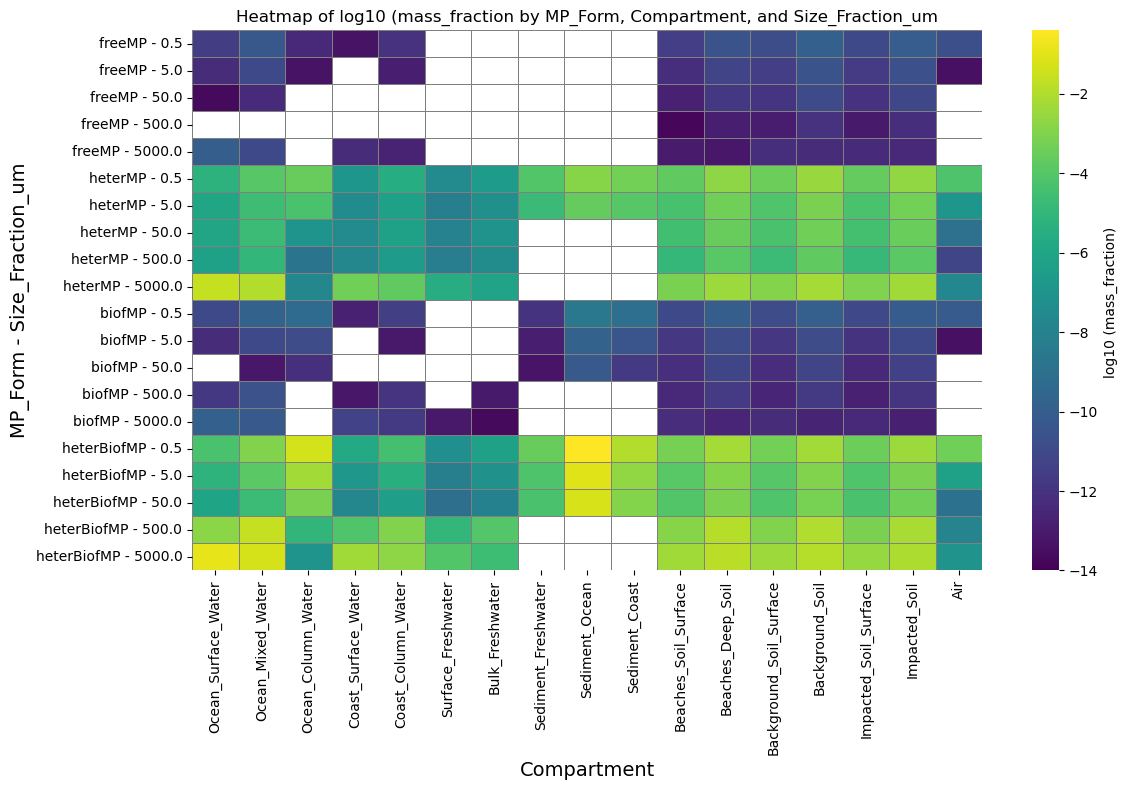

c:\Users\PradoDomercq\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
p:\Python Scripts\UTOPIA_package\utopia\src\utopia\results_processing\process_results.py:264: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table_log = pivot_table_log.applymap(


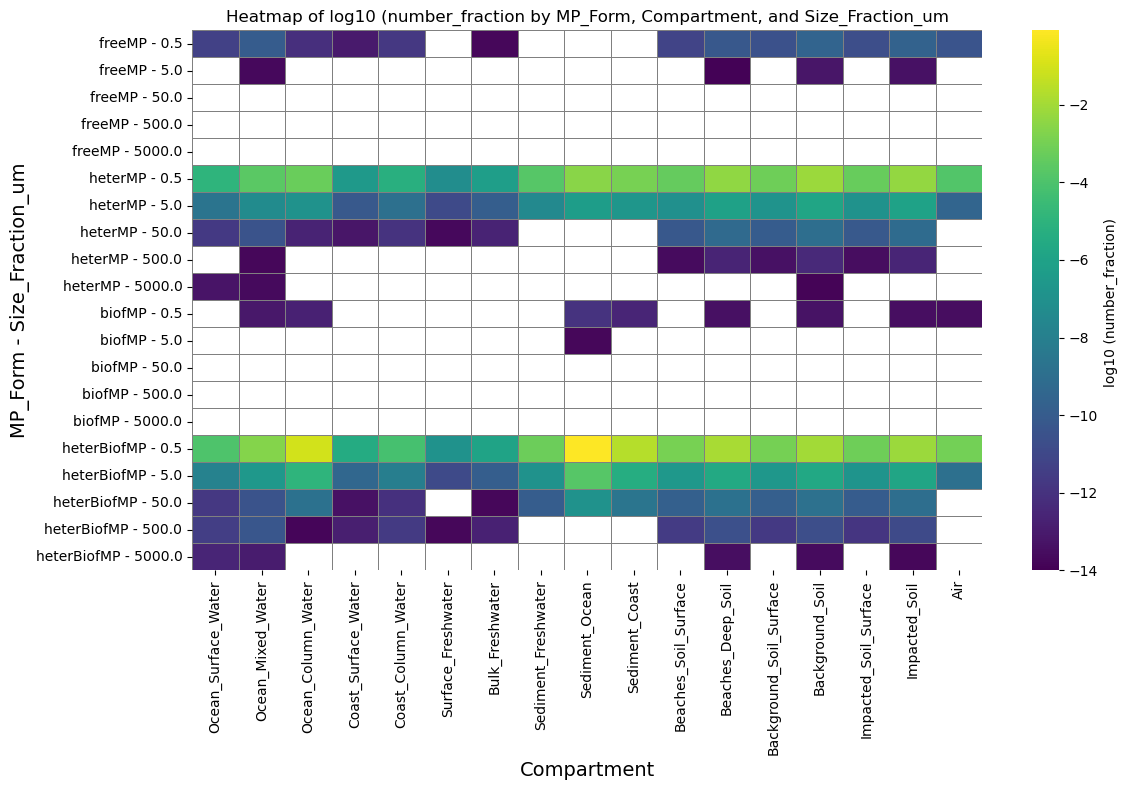

In [15]:
processor.estimate_flows()
processor.generate_flows_dict()
processor.process_results()
for fraction in ["mass_fraction", "number_fraction"]:
    processor.plot_fractionDistribution_heatmaps(fraction)


In [16]:
processor.Results_extended

,Compartment,MP_Form,Size_Fraction_um,mass_g,number_of_particles,concentration_g_m3,concentration_num_m3,mass_fraction,number_fraction,inflows_g_s,inflows_num_s,outflows_g_s,outflows_num_s,Total_inflows_g_s,Total_outflows_g_s,Total_inflows_num_s,Total_outflows_num_s
species,,,,,,,,,,,,,,,,,
aA0_Utopia,Ocean_Surface_Water,freeMP,0.5,1.686063e+01,2.628688e+14,1.034394e-14,1.612692e-01,2.521508e-12,5.194425e-12,"{'k_fragmentation': 0.00015870165696206686, 'k...","{'k_fragmentation': 16.481053079816803, 'k_het...","{'k_discorporation': 2.0494700439425764e-13, '...","{'k_discorporation': 3.1952648641197547, 'k_fr...",0.046556,0.046556,7.233661e+11,7.258404e+11
bA0_Utopia,Ocean_Surface_Water,freeMP,5.0,3.332490e+00,5.195581e+10,2.044472e-15,3.187473e-05,4.983739e-13,1.026674e-15,"{'k_fragmentation': 3.4007458123710254e-05, 'k...","{'k_fragmentation': 0.004030068128126065, 'k_h...","{'k_discorporation': 4.050760645641241e-12, 'k...","{'k_discorporation': 0.06315414661576366, 'k_f...",0.009202,0.009202,1.429335e+08,1.434637e+08
cA0_Utopia,Ocean_Surface_Water,freeMP,50.0,1.415689e-01,2.207156e+06,8.685207e-17,1.354084e-09,2.117163e-14,4.361456e-20,"{'k_fragmentation': 2.2671498712240355e-05, 'k...","{'k_fragmentation': 0.00035391285251252537, 'k...","{'k_discorporation': 1.7208205504671612e-11, '...","{'k_discorporation': 0.00026828776827523106, '...",0.000392,0.000392,5.758812e+03,6.112279e+03
dA0_Utopia,Ocean_Surface_Water,freeMP,500.0,4.541386e-03,7.080333e+01,2.786126e-18,4.343762e-14,6.791644e-16,1.399111e-24,"{'k_fragmentation': 1.133573495548072e-05, 'k_...","{'k_fragmentation': 0.000176731910374956, 'k_h...","{'k_discorporation': 5.5202172205980484e-11, '...","{'k_discorporation': 8.606398605053222e-07, 'k...",0.000230,0.000230,3.402887e+00,3.579456e+00
eA0_Utopia,Ocean_Surface_Water,freeMP,5000.0,7.149675e+02,1.114684e+04,4.386304e-13,6.838549e-12,1.069234e-10,2.202673e-22,"{'k_fragmentation': 0.0, 'k_heteroaggregate_br...","{'k_fragmentation': 0.0, 'k_heteroaggregate_br...","{'k_discorporation': 0.0008690686194689966, 'k...","{'k_discorporation': 0.013549377959954955, 'k_...",327515.557695,327515.557695,5.106193e+06,5.106193e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aD16_Utopia,Air,heterBiofMP,0.5,2.959929e+09,4.614733e+22,9.672970e-10,1.508083e+04,4.426575e-04,9.118952e-04,"{'k_sea_spray_aerosol': 2.072119994834037, 'k_...","{'k_sea_spray_aerosol': 3360510957.670673, 'k_...","{'k_discorporation': 2.579680467116617e-06, 'k...","{'k_discorporation': 40218994.08384188, 'k_fra...",2.340618,2.340618,3.795954e+09,3.649184e+13
bD16_Utopia,Air,heterBiofMP,5.0,3.889235e+06,6.063585e+16,1.270992e-12,1.981564e-02,5.816352e-07,1.198196e-09,"{'k_sea_spray_aerosol': 0.251125528965729, 'k_...","{'k_sea_spray_aerosol': 158067918.08261096, 'k...","{'k_discorporation': 6.4415049906742285e-09, '...","{'k_discorporation': 100.42749651104486, 'k_fr...",0.307548,0.307548,1.935824e+08,4.794885e+09
cD16_Utopia,Air,heterBiofMP,50.0,8.976564e+03,1.399508e+11,2.933518e-15,4.573556e-08,1.342445e-09,2.765501e-15,"{'k_sea_spray_aerosol': 0.03409310658892393, '...","{'k_sea_spray_aerosol': 309984.6956880231, 'k_...","{'k_discorporation': 2.8654539493777774e-10, '...","{'k_discorporation': 0.0044674399371004096, 'k...",0.070984,0.070984,6.454054e+05,1.106685e+06


### Results by compartment

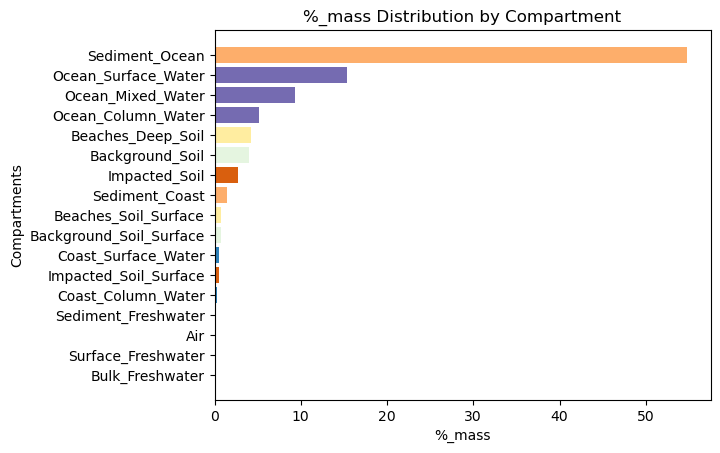

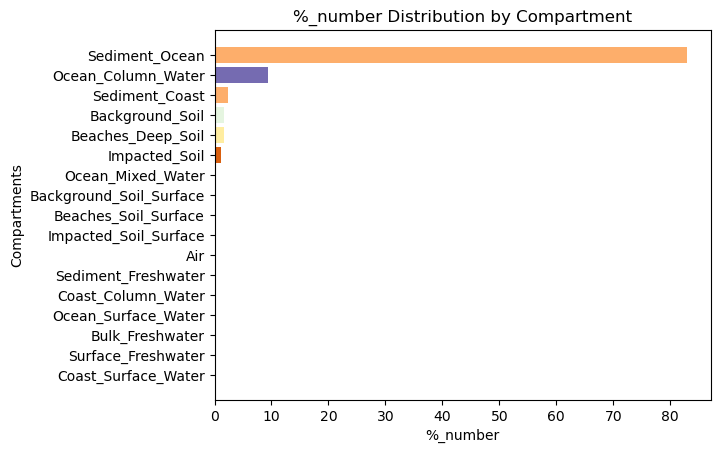

,Compartments,mass_g,number_of_particles,%_mass,%_number,Concentration_g_m3,Concentration_num_m3,inflows_g_s,inflows_num_s,outflows_g_s,outflows_num_s,Total_inflows_g_s,Total_inflows_num_s,Total_outflows_g_s,Total_outflows_num_s
0,Ocean_Surface_Water,1.027798e+12,6.022739e+21,15.370721,0.011901,6.305509e-04,3.694932e+06,"{'k_rising': 2751010492.4142356, 'k_mixing': 8...","{'k_rising': 156368984911.03445, 'k_mixing': 1...","{'k_discorporation': 227070.94403998627, 'k_ad...","{'k_discorporation': 4914844029.662433, 'k_adv...",2.836749e+09,1.662347e+19,2.836999e+09,1.664402e+19
1,Ocean_Mixed_Water,6.210199e+11,1.204584e+23,9.287354,0.238032,1.904969e-05,3.695042e+06,"{'k_settling': 1830.3599452393387, 'k_mixing':...","{'k_settling': 2.0978103492605504e+16, 'k_mixi...","{'k_discorporation': 9871.669289315505, 'k_adv...","{'k_discorporation': 9824674224.366047, 'k_adv...",2.836732e+09,1.664501e+19,2.836732e+09,1.664592e+19
2,Ocean_Column_Water,3.459635e+11,4.741780e+24,5.173885,9.370004,2.640943e-07,3.619679e+06,"{'k_settling': 1831.2947501937715, 'k_mixing':...","{'k_settling': 2.0980940632933684e+16, 'k_mixi...","{'k_discorporation': 0.08099662473927177, 'k_a...","{'k_discorporation': 411559160894.5424, 'k_adv...",2.064596e+03,2.143873e+16,2.064596e+03,2.143905e+16
3,Coast_Surface_Water,3.409973e+10,1.861744e+20,0.509962,0.000368,5.081928e-04,2.774581e+06,"{'k_advective_transport': 42317.83618430557, '...","{'k_advective_transport': 248041217446467.22, ...","{'k_discorporation': 7827.527263604359, 'k_adv...","{'k_discorporation': 153463426.41895777, 'k_ad...",1.879936e+08,1.027014e+18,1.879936e+08,1.027650e+18
4,Coast_Column_Water,2.192517e+10,3.719968e+21,0.327891,0.007351,1.636207e-05,2.776095e+06,"{'k_advective_transport': 8524.964133297426, '...","{'k_advective_transport': 1652797349972631.2, ...","{'k_discorporation': 340.5803640182434, 'k_adv...","{'k_discorporation': 306410189.7261517, 'k_adv...",1.879587e+08,1.029227e+18,1.879587e+08,1.029255e+18
5,Surface_Freshwater,6.037404e+08,8.536419e+18,0.009029,0.000017,6.671165e-05,9.432507e+05,"{'k_rising': 3543891.343711859, 'k_mixing': 50...","{'k_rising': 178231745.95980468, 'k_mixing': 5...","{'k_discorporation': 130.35378172784428, 'k_ad...","{'k_discorporation': 5684463.386279209, 'k_adv...",4.045212e+06,5.732779e+16,4.045212e+06,5.733763e+16
6,Bulk_Freshwater,7.479989e+08,8.542084e+19,0.011186,0.000169,8.265181e-06,9.438767e+05,"{'k_settling': 12.4188677467183, 'k_mixing': 4...","{'k_settling': 143513500922508.3, 'k_mixing': ...","{'k_discorporation': 3.87129212951142, 'k_adve...","{'k_discorporation': 5687625.66108902, 'k_adve...",4.045077e+06,5.737634e+16,4.045077e+06,5.737670e+16
7,Sediment_Freshwater,3.364389e+09,3.881828e+22,0.050314,0.076707,3.717557e-03,4.289313e+10,{'k_settling': 12.448375374069439},{'k_settling': 143627069817884.2},"{'k_discorporation': 0.00013594520178341927, '...","{'k_discorporation': 283862259.22529763, 'k_se...",1.244838e+01,1.436271e+14,1.244838e+01,1.436279e+14
8,Sediment_Ocean,3.662392e+12,4.196438e+25,54.771083,82.923798,3.740952e-01,4.286454e+12,{'k_settling': 1867.9777246517608},{'k_settling': 2.1401270103414756e+16},"{'k_discorporation': 0.15782567086561444, 'k_s...","{'k_discorporation': 364895732586.6656, 'k_sed...",1.867978e+03,2.140127e+16,1.867978e+03,2.140220e+16
9,Sediment_Coast,9.881035e+10,1.184675e+24,1.477709,2.340979,3.686953e-02,4.420429e+11,{'k_settling': 108.69479765293994},{'k_settling': 1303131539265622.8},"{'k_discorporation': 0.0034166468525191635, 'k...","{'k_discorporation': 9981439995.423258, 'k_sed...",1.086948e+02,1.303132e+15,1.086948e+02,1.303153e+15


In [17]:
processor.extract_results_by_compartment()
for fraction in ["%_mass", "%_number"]:
    processor.plot_compartment_distribution(fraction)
processor.results_by_comp



#### Mass balance by compartment


In [18]:
for i in range(len(processor.results_by_comp)):
    emissions=sum(processor.model.emiss_dict_g_s[processor.results_by_comp['Compartments'].iloc[i]].values())
    print(f"Mass balance for {processor.results_by_comp['Compartments'].iloc[i]}: {processor.results_by_comp['Total_inflows_g_s'].iloc[i]+emissions-processor.results_by_comp['Total_outflows_g_s'].iloc[i]}")

Mass balance for Ocean_Surface_Water: 4.76837158203125e-07
Mass balance for Ocean_Mixed_Water: -9.5367431640625e-07
Mass balance for Ocean_Column_Water: 1.3642420526593924e-12
Mass balance for Coast_Surface_Water: 0.0
Mass balance for Coast_Column_Water: 2.9802322387695312e-08
Mass balance for Surface_Freshwater: -4.656612873077393e-10
Mass balance for Bulk_Freshwater: 4.656612873077393e-10
Mass balance for Sediment_Freshwater: -3.552713678800501e-15
Mass balance for Sediment_Ocean: -2.0463630789890885e-12
Mass balance for Sediment_Coast: 8.526512829121202e-14
Mass balance for Beaches_Soil_Surface: 4.547473508864641e-13
Mass balance for Beaches_Deep_Soil: -1.1368683772161603e-13
Mass balance for Background_Soil_Surface: 2.2737367544323206e-13
Mass balance for Background_Soil: 0.0
Mass balance for Impacted_Soil_Surface: 1.1368683772161603e-13
Mass balance for Impacted_Soil: 0.0
Mass balance for Air: -9.094947017729282e-13


### Exposure Indicators

In [19]:
# from results_processing.exposure_indicators_calculation import*
# # Calculate exposure indicators
# Exposure_indicators_calculation(processor)
processor.estimate_exposure_indicators()

In [20]:
processor.overall_exposure_indicators


,Overall exposure indicators,Overall persistence (years),Overall residence time (years)
0,Mass,3.424419e-01,0.338742
1,Number,2.225797e+06,5.552718


In [21]:
processor.size_fraction_indicators


,Size (um),Pov (years),Tov (years)
0,0.5,2.226315e+06,5.517269
1,5.0,3.020507e+05,5.180069
2,50.0,3.838720e+04,4.751292
3,500.0,1.429952e+02,125.957947
4,5000.0,2.461102e-01,0.246089


Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.
Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.
Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.
Environmentally Dispersed Mass Fractions through Air = 4.044946228243052e-05
Environmentally Dispersed Mass Fractions through Ocean_Mixed_Water = 2.0400845908530635e-05
Environmentally Dispersed Mass Fractions through Ocean_Surface_Water = 2.027851637826902e-06
φ1 for mass = 6.287815982878805e-05
Remotely transferred fraction to Ocean_Surface_Water = 4.552165731267304e-05
Remotely transferred fraction to Ocean_Column_Wat

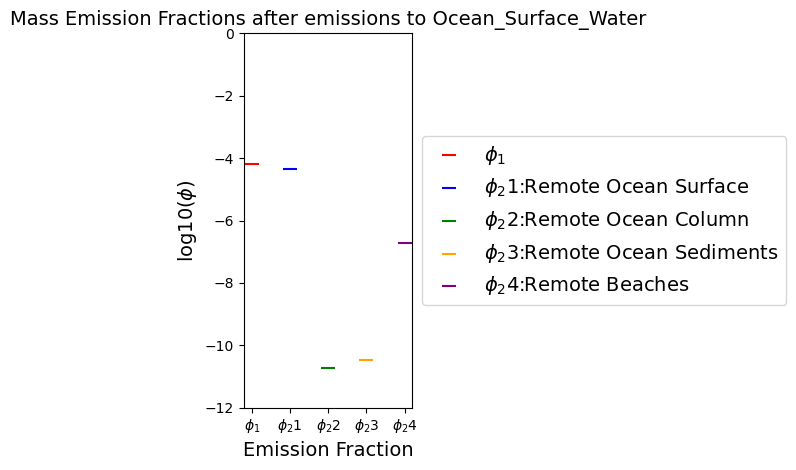

In [22]:
processor.estimate_emission_fractions()


# Let's print the results (this part depends on how your model outputs results).
# print("Model Results:", results)

# Step 5: Visualize the Results (Optional)

# If your model has data for visualization, we can plot the results using libraries like matplotlib.
# Example:
# import matplotlib.pyplot as plt

# plt.plot(results['some_data_column'])  # Replace with actual results data
# plt.title("Model Results Over Time")
# plt.xlabel("Time")
# plt.ylabel("Value")
# plt.show()

# Step 6: Advanced Configuration (Optional)

# Allow users to adjust some configuration parameters if needed. This could be useful if you want to modify some settings during runtime.
# For example:
# user_config = {"MPdensity_kg_m3": 1200, "boxName": "New_Box"}  # Modify based on user input
# model.update_config(user_config)  # Assuming a method for updating configuration

# Step 7: Saving the Model Output (Optional)

# If you want users to save the results, add a section for that.
# Example:
# output_file = "model_output.json"
# with open(output_file, "w") as file:
#     json.dump(results, file)
# print(f"Results saved to {output_file}")


# For example, assuming the model returns results as a dictionary or DataFrame:
# results = model.get_results()  # Replace with the actual result retrieval method

# Let's print the results (this part depends on how your model outputs results).
# print("Model Results:", results)

# Step 5: Visualize the Results (Optional)

# If your model has data for visualization, we can plot the results using libraries like matplotlib.
# Example:
# import matplotlib.pyplot as plt

# plt.plot(results['some_data_column'])  # Replace with actual results data
# plt.title("Model Results Over Time")
# plt.xlabel("Time")
# plt.ylabel("Value")
# plt.show()

# Step 6: Advanced Configuration (Optional)

# Allow users to adjust some configuration parameters if needed. This could be useful if you want to modify some settings during runtime.
# For example:
# user_config = {"MPdensity_kg_m3": 1200, "boxName": "New_Box"}  # Modify based on user input
# model.update_config(user_config)  # Assuming a method for updating configuration

# Step 7: Saving the Model Output (Optional)

# If you want users to save the results, add a section for that.
# Example:
# output_file = "model_output.json"
# with open(output_file, "w") as file:
#     json.dump(results, file)
# print(f"Results saved to {output_file}")
